In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
plt.style.use('seaborn-v0_8-poster')
pd.set_option('display.max_columns', 200)

In [72]:
df = pd.read_csv('D:\\IMPORTANT DATA\\AIU Computer Engineering\\CE Year 2\\Semester 2\\AIE121 Machine Learning\\Project\\parkinsons.csv')

***The dataset used was imported from the following source: https://archive.ics.uci.edu/dataset/174/parkinsons***

# Exploratory Data Analysis

In [73]:
df.shape
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [74]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [75]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

***Counting the number of features in the dataset.***

In [76]:
len(df.columns)

24

***Checking the data types of all the features to know which ones to omit and which ones to keep***

In [77]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

***Checking for any missing values.***

In [78]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

***Checking for any duplicated data.***

In [79]:
df.loc[df.duplicated()]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


***Moving the 'status' column to the end as it represents the dependent feature in this dataset.***

In [80]:
df1 = df.pop('status')
df['status'] = df1
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


***Dropping the 'name' column because it isn't of any use***

In [81]:
df = df.drop('name', axis = 1)
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


In [82]:
df.status.value_counts()

status
1    147
0     48
Name: count, dtype: int64

***There are 147 people diagnosed with Parkinson's and 48 who aren't.***

### Checking for class imbalances 
- ***Majority Class***: 1 or people with Parkinson's 
- ***Minority Class***: 0 or people without Parkinson's

Majority Class :  0.7538461538461538
Minority class:  0.24615384615384617


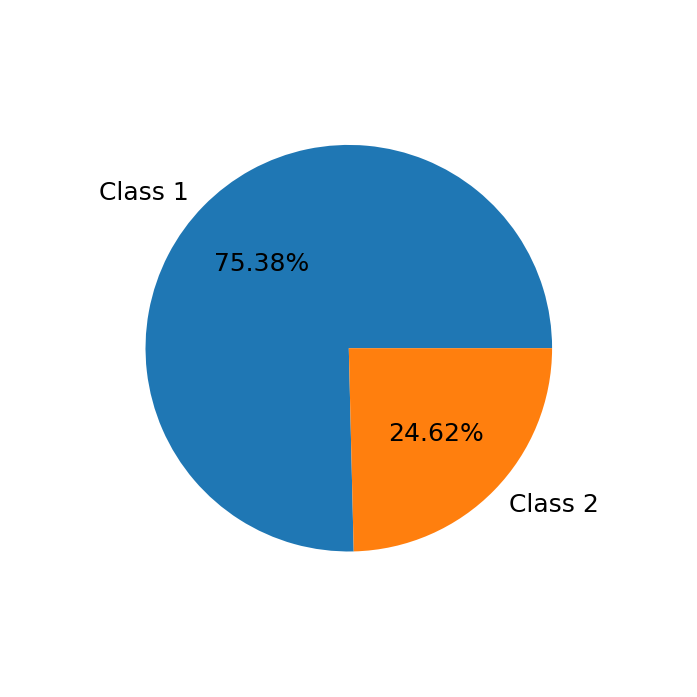

In [83]:
class1 = 147 / 195
class2 = 48 / 195
print("Majority Class : ", class1)
print("Minority class: ", class2)
data = [class1, class2]
keys = ['Class 1', 'Class 2']
plt.pie(data, labels = keys, radius = 0.75, 
        autopct = '%1.2f%%', textprops = { 'fontsize' : 18})
plt.show()

***Since the degree of imbalance is mild, i.e 20-40%, there isn't a need for downsampling or upweighting.***

### Univariate Analysis

d:\IMPORTANT DATA\Projects\Parkinson's Disease Prediction Model\boom\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
d:\IMPORTANT DATA\Projects\Parkinson's Disease Prediction Model\boom\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
d:\IMPORTANT DATA\Projects\Parkinson's Disease Prediction Model\boom\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='PPE'>

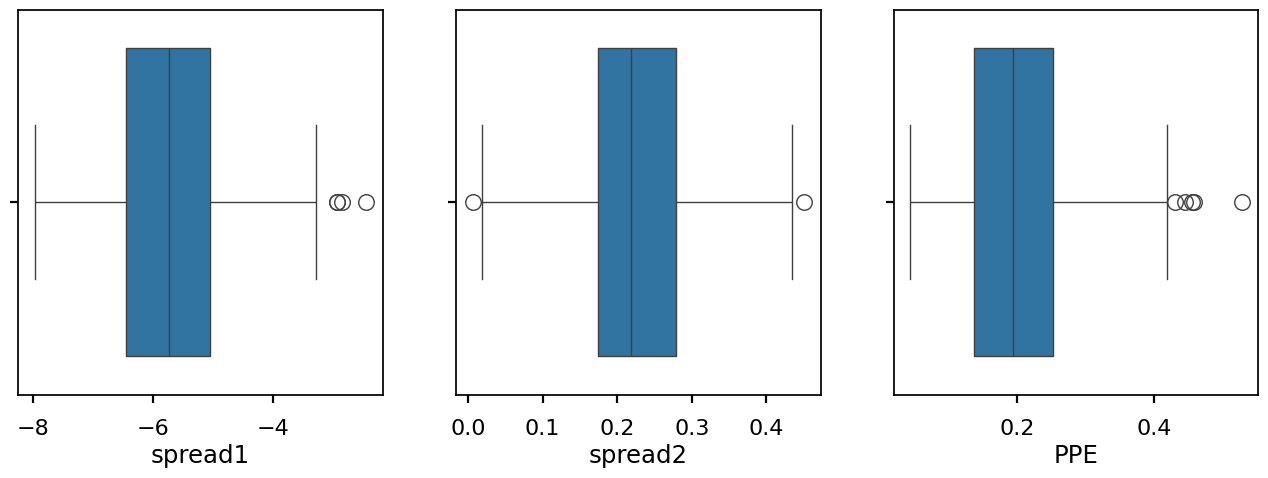

In [84]:
fig, ax = plt.subplots(1, 3, figsize = (16, 5))
sns.boxplot(x = 'spread1', data = df, ax = ax[0], orient = 'v')
sns.boxplot(x = 'spread2', data = df, ax = ax[1], orient = 'v')
sns.boxplot(x = 'PPE', data = df, ax = ax[2], orient = 'v')

***Plotting the distribution of the minimum, average, and maximum vocal fundamental frequencies respectively and displaying lines to mark the mean (red line) and median (blue dashed line) for each frequency.***

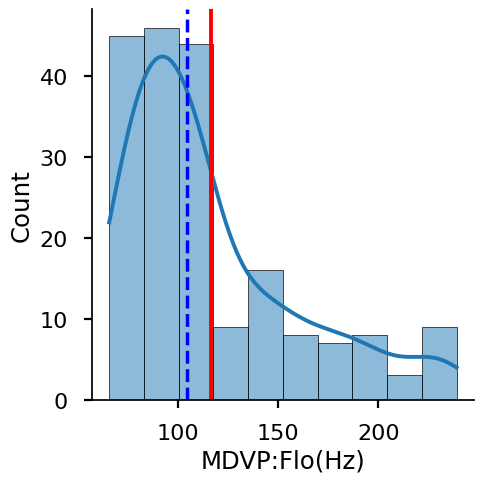

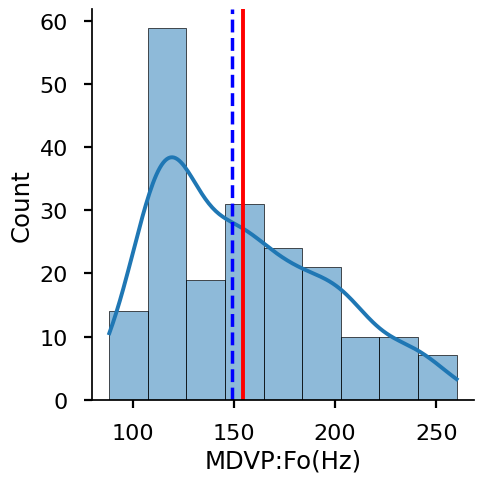

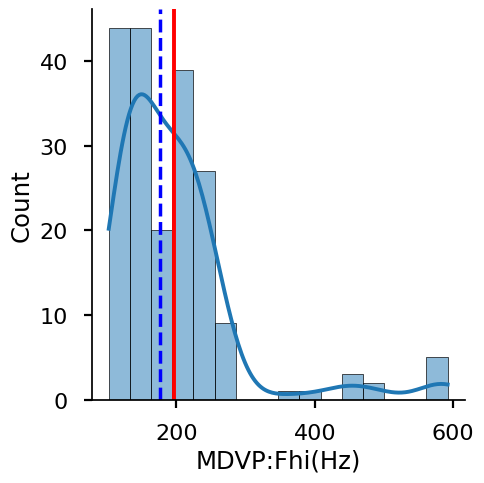

In [85]:
sns.displot(df, x = "MDVP:Flo(Hz)", kde = True)
plt.axvline(x = df['MDVP:Flo(Hz)'].mean(),
            color='red')
plt.axvline(x = df['MDVP:Flo(Hz)'].median(),
            color='blue',
            ls='--', 
            lw=2.5)
sns.displot(df, x = "MDVP:Fo(Hz)", kde = True)
plt.axvline(x = df['MDVP:Fo(Hz)'].mean(),
            color='red')
plt.axvline(x = df['MDVP:Fo(Hz)'].median(),
            color='blue',
            ls='--', 
            lw=2.5)
sns.displot(df, x = "MDVP:Fhi(Hz)", kde = True)
plt.axvline(x = df['MDVP:Fhi(Hz)'].mean(),
            color='red')
plt.axvline(x = df['MDVP:Fhi(Hz)'].median(),
             color='blue',
             ls="--",
             lw=2.5)

***The measures of the minimum, average, and maximum vocal fundamental frequencies are shown above*** \

**Observations**:
- The distribution of the min vocal fundamental frequency is positively skewed with most values being in the 65Hz - 125Hz range.
- The avg vocal fundamental frequency is quite similar to a normal distribution while most of its values range from ~110Hz - ~130Hz.
- The max vocal frequency is almost normally distributed with some outliers on its right tail.

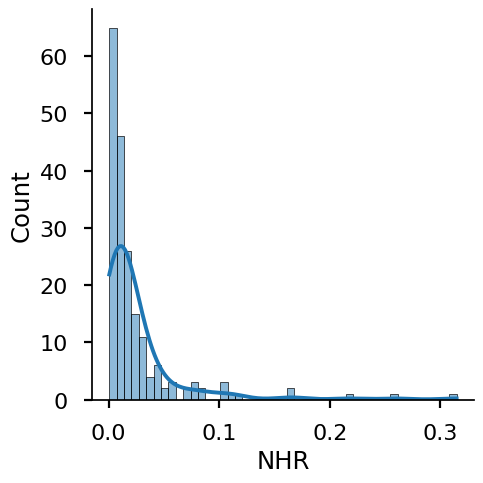

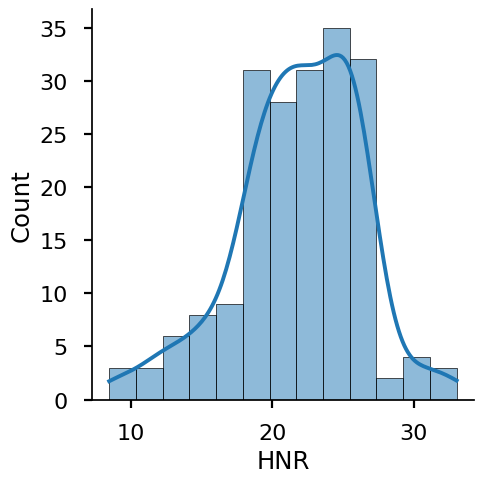

In [86]:
sns.displot(df, x = "NHR", kde = True)
sns.displot(df, x = "HNR", kde = True)

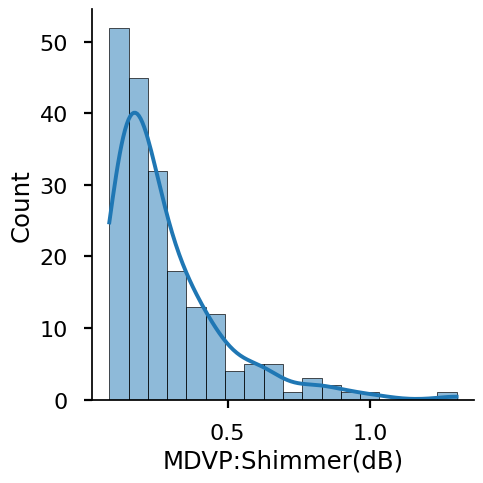

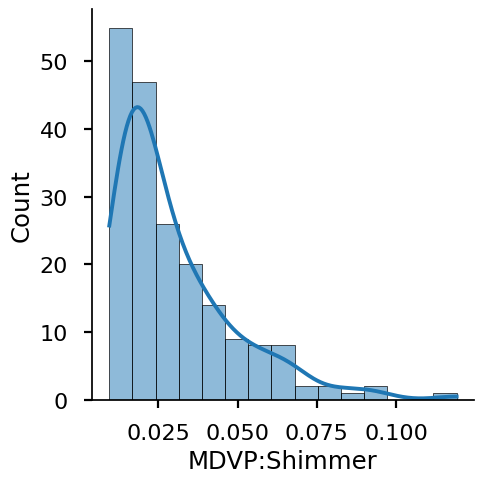

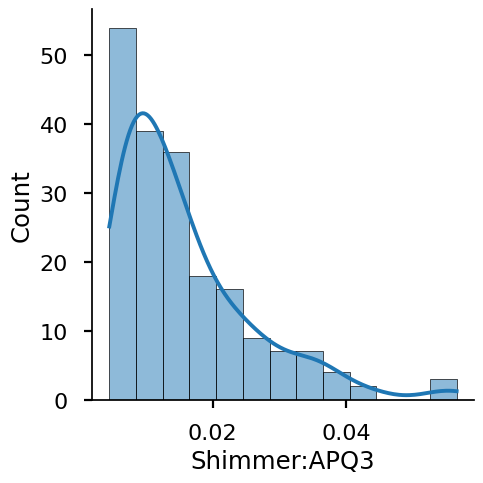

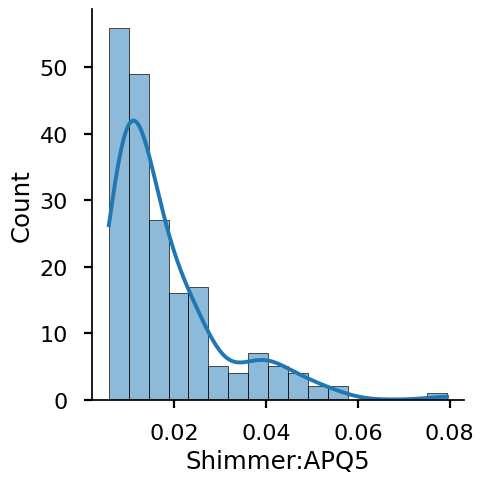

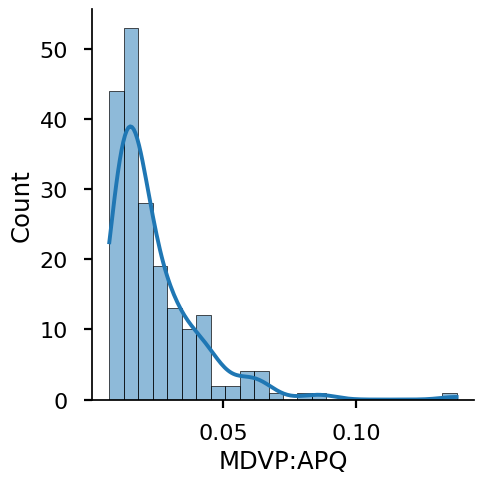

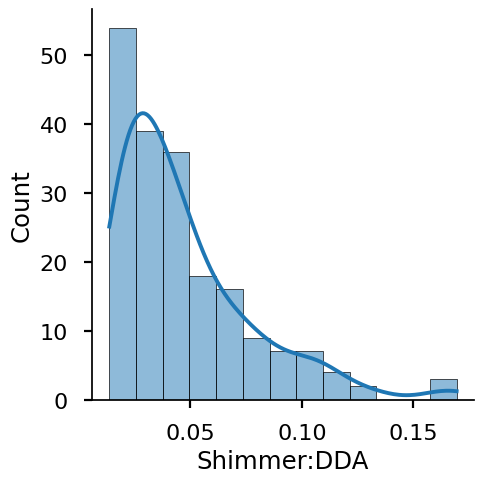

In [87]:
sns.displot(df, x = "MDVP:Shimmer(dB)", kde = True) 
sns.displot(df, x = "MDVP:Shimmer", kde = True) 
sns.displot(df, x = "Shimmer:APQ3", kde = True) 
sns.displot(df, x = "Shimmer:APQ5", kde = True) 
sns.displot(df, x = "MDVP:APQ", kde = True) 
sns.displot(df, x = "Shimmer:DDA", kde = True)


<Axes: xlabel='spread1', ylabel='Density'>

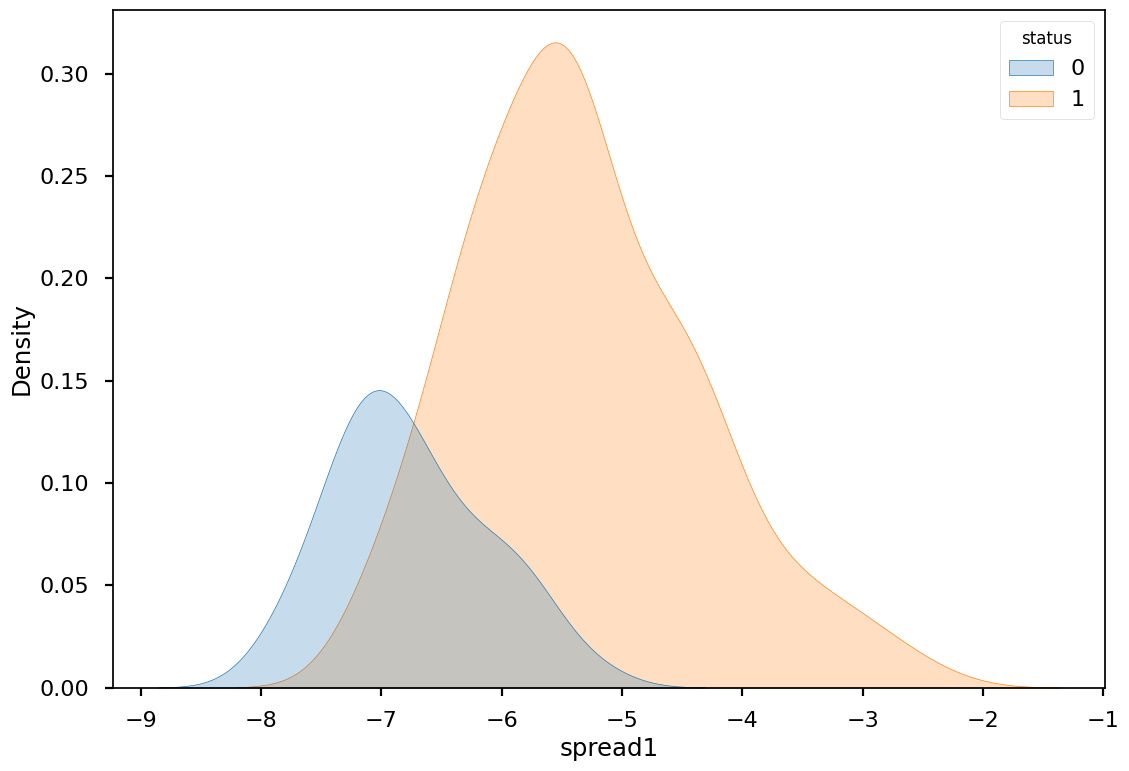

In [88]:
sns.kdeplot(df, x = 'spread1', hue = df['status'], fill = True)

<Axes: xlabel='status', ylabel='HNR'>

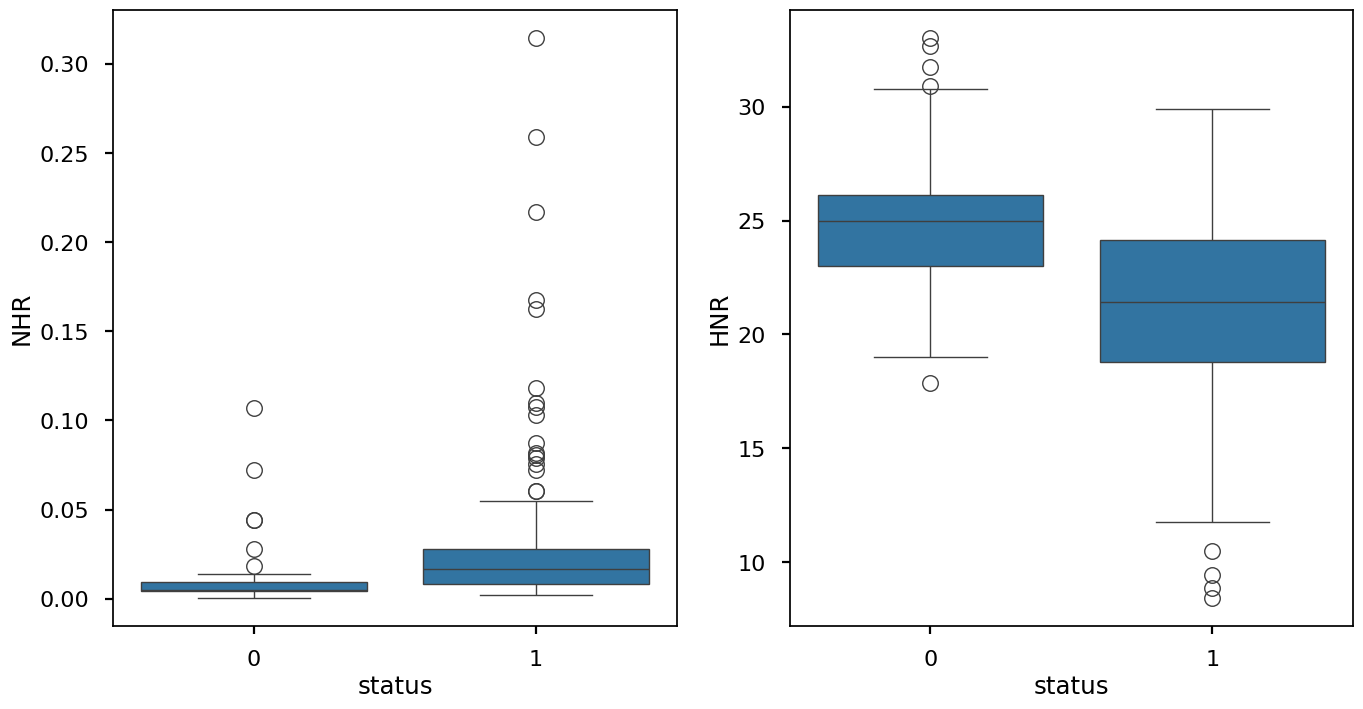

In [89]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x = 'status', y = 'NHR', data = df, ax = ax[0])
sns.boxplot(x = 'status', y = 'HNR', data = df, ax = ax[1])

C:\Users\mido2\AppData\Local\Temp\ipykernel_3772\519121308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'status', y = cols[i], data = df,
C:\Users\mido2\AppData\Local\Temp\ipykernel_3772\519121308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'status', y = cols[i], data = df,
C:\Users\mido2\AppData\Local\Temp\ipykernel_3772\519121308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'status', y = cols[i], data = df,
C:\Users\mido2\AppData\Local\Temp\ipykernel_3772\519121308.py:5: FutureWarning: 

Passing `palette` 

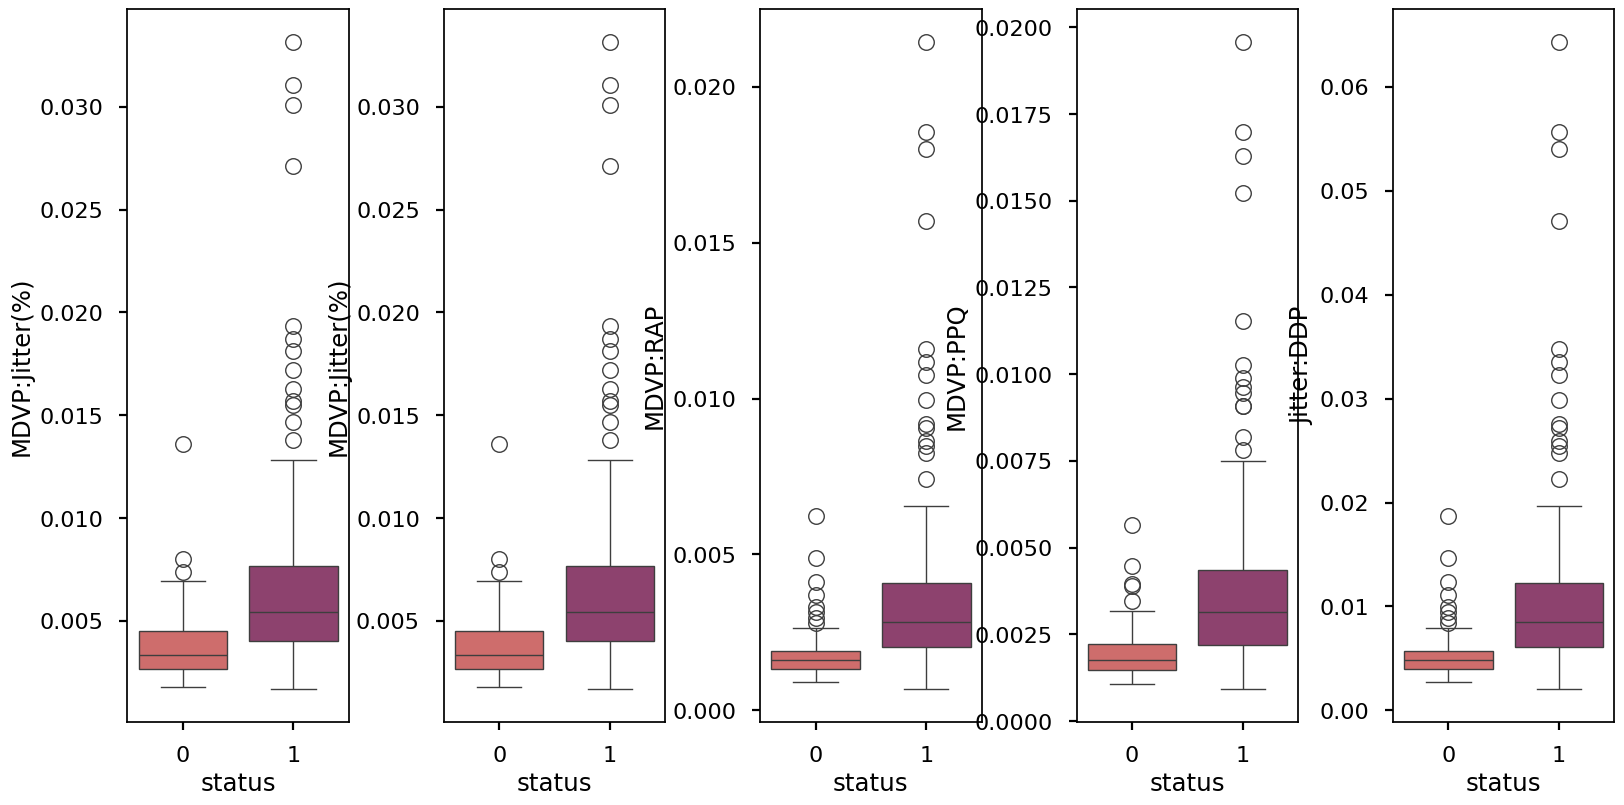

In [90]:
cols = ["MDVP:Jitter(%)", "MDVP:Jitter(%)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP"]
fig, axs = plt.subplots(ncols = 5, figsize = (16, 8))
fig.tight_layout()
for i in range(0, len(cols)):
    sns.boxplot(x = 'status', y = cols[i], data = df, 
                ax = axs[i], palette = "flare")

C:\Users\mido2\AppData\Local\Temp\ipykernel_3772\1049782190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'status', y = 'MDVP:Flo(Hz)', data = df, palette = "Set1", ax = ax[0])
C:\Users\mido2\AppData\Local\Temp\ipykernel_3772\1049782190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'status', y = 'MDVP:Fo(Hz)', data = df, palette = "Set1", ax = ax[1])
C:\Users\mido2\AppData\Local\Temp\ipykernel_3772\1049782190.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'status', y = 'MDVP:Fhi(Hz)', data = df, palette = "Set1",

<Axes: xlabel='status', ylabel='MDVP:Fhi(Hz)'>

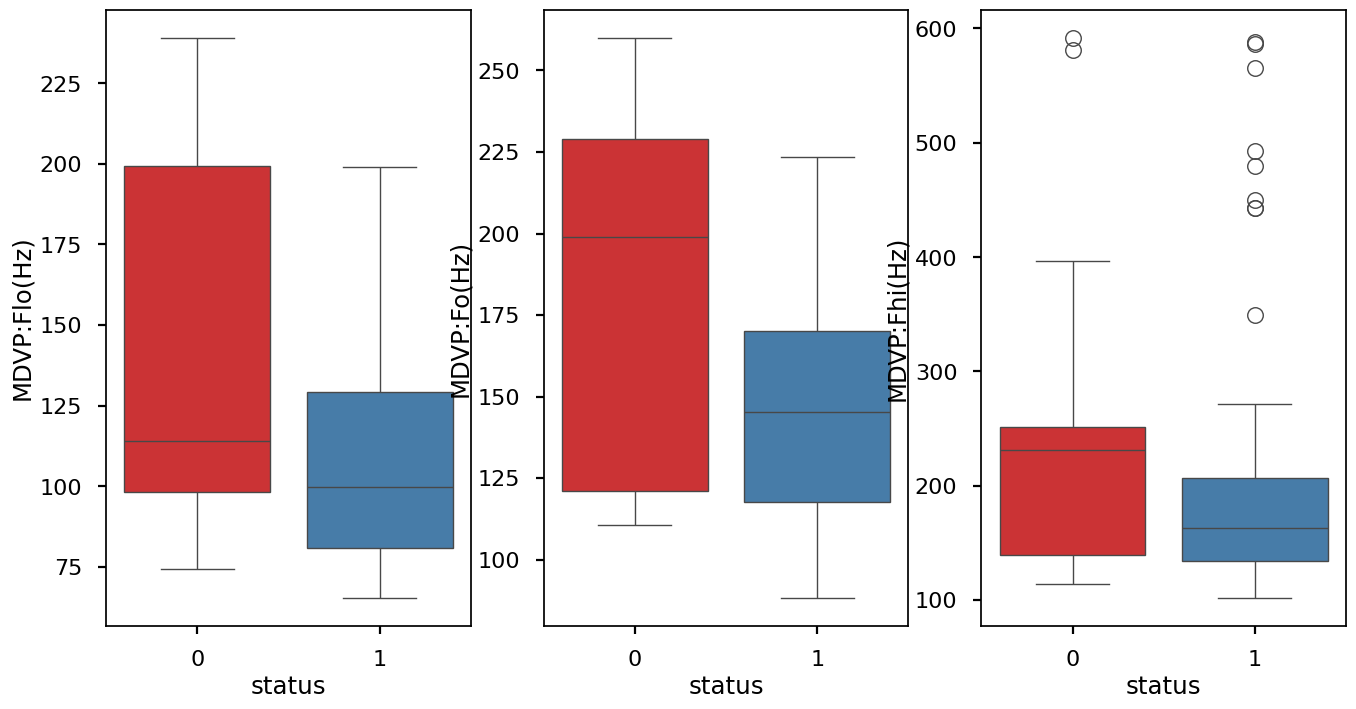

In [91]:
fig, ax = plt.subplots(1, 3, figsize = (16,8))
sns.boxplot(x = 'status', y = 'MDVP:Flo(Hz)', data = df, palette = "Set1", ax = ax[0])
sns.boxplot(x = 'status', y = 'MDVP:Fo(Hz)', data = df, palette = "Set1", ax = ax[1])
sns.boxplot(x = 'status', y = 'MDVP:Fhi(Hz)', data = df, palette = "Set1", ax = ax[2])

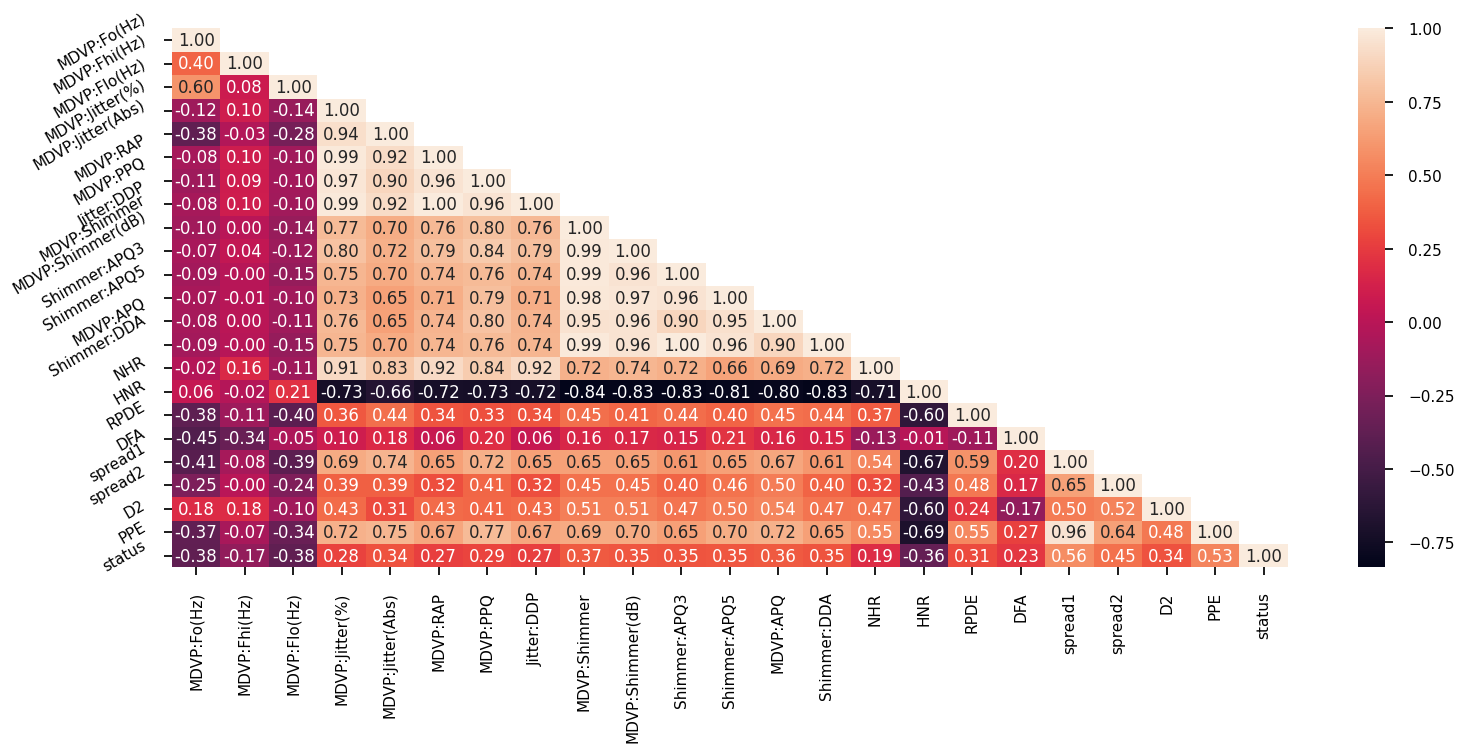

In [92]:
corr = df.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth": 3.5})
plt.figure(figsize=(18, 7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, mask = mask, annot = True, fmt = '.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# Initial Model Implementation

### K-Nearest Neighbours Model

In [93]:
X = df.drop("status",axis=1)
Y = df["status"]

In [94]:
X_train, X_test, y_train,  y_test = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=40)
print(len(X_train)),print(len(X_test))

136
59


(None, None)

In [95]:
k_model = KNeighborsClassifier(n_neighbors = 5)
k_model.fit(X_train, y_train)

KNeighborsClassifier()

In [96]:
y_pred = k_model.predict(X_test)
KNNScore = accuracy_score(y_test,y_pred)
KNN_precision = precision_score(y_test, y_pred)
KNN_recall = recall_score(y_test, y_pred)
KNN_f1 = f1_score(y_test, y_pred)
KNN_auc = roc_auc_score(y_test, y_pred)

print(f"KNN Accuracy Score: {KNNScore:.4f}")
print(f"KNN Precision: {KNN_precision:.4f}")
print(f"KNN Recall: {KNN_recall:.4f}")
print(f"KNN F1 Score: {KNN_f1:.4f}")
print(f"KNN AUC-ROC: {KNN_auc:.4f}")

KNN Accuracy Score: 0.8475
KNN Precision: 0.8936
KNN Recall: 0.9130
KNN F1 Score: 0.9032
KNN AUC-ROC: 0.7642


In [97]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in KNN: {}'.format(count_misclassified))

Misclassified samples in KNN: 9


### XGBoost Model

In [98]:
import xgboost as xgb
df = xgb.DMatrix(data = X, label = Y)

In [99]:
from xgboost import XGBClassifier

In [100]:
parameters = {
    'objective' : 'binary:logistic',
    'max_depth' : 3,
    'alpha' : 4,
    'learning_rate' : 0.1,
    'n_estimators' : 500
}

xgb_model = XGBClassifier(**parameters)

In [101]:
xgb_model.fit(X_train, y_train)
y_pred2 = xgb_model.predict(X_test)
XGBScore = accuracy_score(y_test, y_pred2)
XGB_precision = precision_score(y_test, y_pred2)
XGB_recall = recall_score(y_test, y_pred2)
XGB_f1 = f1_score(y_test, y_pred2)
XGB_auc = roc_auc_score(y_test, y_pred2)

print(f"XGBoost Accuracy Score: {XGBScore:.4f}")
print(f"XGBoost Precision: {XGB_precision:.4f}")
print(f"XGBoost Recall: {XGB_recall:.4f}")
print(f"XGBoost F1 Score: {XGB_f1:.4f}")
print(f"XGBoost AUC-ROC: {XGB_auc:.4f}")

XGBoost Accuracy Score: 0.8983
XGBoost Precision: 0.9167
XGBoost Recall: 0.9565
XGBoost F1 Score: 0.9362
XGBoost AUC-ROC: 0.8244


### Random Forest Model

In [102]:
rand_frst = RandomForestClassifier(n_estimators = 50)
rand_frst = rand_frst.fit(X_train, y_train)
y_pred1 = rand_frst.predict(X_test)
RForestScore = accuracy_score(y_test, y_pred1)
RF_precision = precision_score(y_test, y_pred1)
RF_recall = recall_score(y_test, y_pred1)
RF_f1 = f1_score(y_test, y_pred1)
RF_auc = roc_auc_score(y_test, y_pred1)

print(f"Random forest Accuracy Score: {RForestScore:.4f}")
print(f"Random Forest Precision: {RF_precision:.4f}")
print(f"Random Forest Recall: {RF_recall:.4f}")
print(f"Random Forest F1 Score: {RF_f1:.4f}")
print(f"Random Forest AUC-ROC: {RF_auc:.4f}")


Random forest Accuracy Score: 0.8814
Random Forest Precision: 0.9149
Random Forest Recall: 0.9348
Random Forest F1 Score: 0.9247
Random Forest AUC-ROC: 0.8135


In [103]:
count_misclassified = (y_test != y_pred1).sum()
print('Misclassified samples in Random Forest: {}'.format(count_misclassified))

Misclassified samples in Random Forest: 7


### Support Vector Machine Model

In [ ]:
svmCl = SVC(kernel = 'linear', random_state = 100)
svmCl.fit(X_train, y_train)

SVC(kernel='linear', random_state=100)

In [ ]:
y_pred3 = svmCl.predict(X_test)
SVMScore = accuracy_score(y_test, y_pred3)
SVM_precision = precision_score(y_test, y_pred3)
SVM_recall = recall_score(y_test, y_pred3)
SVM_f1 = f1_score(y_test, y_pred3)
SVM_auc = roc_auc_score(y_test, y_pred3)

print(f"SVM Accuracy Score: {SVMScore:.4f}")
print(f"SVM Precision: {SVM_precision:.4f}")
print(f"SVM Recall: {SVM_recall:.4f}")
print(f"SVM F1 Score: {SVM_f1:.4f}")
print(f"SVM AUC-ROC: {SVM_auc:.4f}")

SVM Accuracy Score: 0.8983
SVM Precision: 0.9000
SVM Recall: 0.9783
SVM F1 Score: 0.9375
SVM AUC-ROC: 0.7968


# Model Comparison

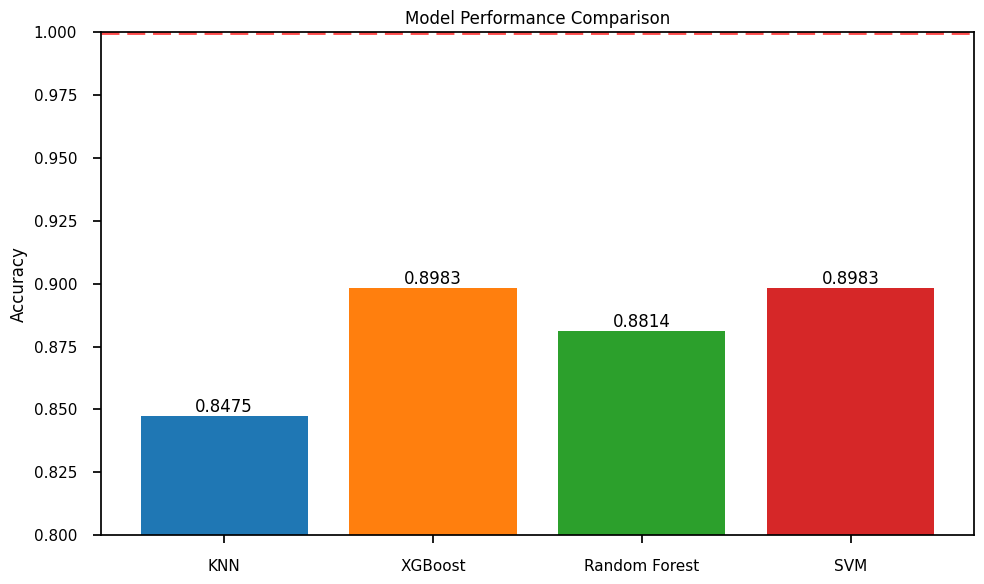

In [109]:
# Model performance data
models = ['KNN', 'XGBoost', 'Random Forest', 'SVM']
accuracies = [KNNScore, XGBScore, RForestScore, SVMScore]

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(models, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Customize the chart
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_ylim(0.8, 1.0)  # Set y-axis to start from 0.9 for better visibility of differences

# Add value labels on the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom')

# Add a horizontal line at y=1 for reference
ax.axhline(y=1, color='r', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

In [116]:
# Classification Reports for each model
print("KNN Classification Report:\n", classification_report(y_test, y_pred))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred2))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred1))
print("SVM Classification Report:\n", classification_report(y_test, y_pred3))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.89      0.91      0.90        46

    accuracy                           0.85        59
   macro avg       0.78      0.76      0.77        59
weighted avg       0.84      0.85      0.85        59

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.92      0.96      0.94        46

    accuracy                           0.90        59
   macro avg       0.87      0.82      0.84        59
weighted avg       0.89      0.90      0.90        59

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.91      0.93      0.92        46

    accuracy                           0.88        59
   macro avg       0.83      0

# Hyperparamter Tuning

##### Tuning the XGBoost since it was the best performing model and has the most potential for improvement.

In [124]:
param_grid = {
    'max_depth' : [2, 3, 4, 5],
    'learning_rate' : [0.1, 0.01, 0.001],
    'n_estimators' : [100, 300, 500],
    'alpha' : [0, 1, 4, 7, 10]

}

In [125]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auc_roc': roc_auc_score(y_test, y_pred_proba)
    }

In [126]:
initial_model = XGBClassifier(objective='binary:logistic', random_state=42)
print("Part 1: Initial Model Testing")
print("-" * 30)
initial_model.fit(X_train, y_train)
initial_metrics = evaluate_model(initial_model, X_test, y_test)
print("XGBoost - Initial Metrics:")
for metric, value in initial_metrics.items():
    print(f"  {metric}: {value:.4f}")
print()

Part 1: Initial Model Testing
------------------------------
XGBoost - Initial Metrics:
  accuracy: 0.9322
  precision: 0.9565
  recall: 0.9565
  f1: 0.9565
  auc_roc: 0.9833



In [127]:
print("Tuning XGBoost...")
grid_search = GridSearchCV(XGBClassifier(objective='binary:logistic', random_state=42), 
                           param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

tuned_model = grid_search.best_estimator_
tuned_metrics = evaluate_model(tuned_model, X_test, y_test)

print(f"Best parameters: {grid_search.best_params_}")
print("Tuned Metrics:")
for metric, value in tuned_metrics.items():
    print(f"  {metric}: {value:.4f}")
    print(f"  Improvement: {value - initial_metrics[metric]:.4f}")

Tuning XGBoost...
Best parameters: {'alpha': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300}
Tuned Metrics:
  accuracy: 0.9322
  Improvement: 0.0000
  precision: 0.9565
  Improvement: 0.0000
  recall: 0.9565
  Improvement: 0.0000
  f1: 0.9565
  Improvement: 0.0000
  auc_roc: 0.9833
  Improvement: 0.0000


In [128]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
import time

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auc_roc': roc_auc_score(y_test, y_pred_proba)
    }

# Assume X and Y are your features and target variables
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Define initial XGBoost model
initial_model = XGBClassifier(objective='binary:logistic', random_state=42)

# Part 1: Initial Model Testing
print("Part 1: Initial Model Testing")
print("-" * 30)
initial_model.fit(X_train, y_train)
initial_metrics = evaluate_model(initial_model, X_test, y_test)
print("XGBoost - Initial Metrics:")
for metric, value in initial_metrics.items():
    print(f"  {metric}: {value:.4f}")
print()

# Part 2: Randomized Search for Hyperparameter Tuning
print("\nPart 2: Randomized Search for Hyperparameter Tuning")
print("-" * 30)

# Define the parameter distribution for randomized search
param_dist = {
    'max_depth': randint(1, 7),
    'learning_rate': uniform(0.001, 0.3),
    'n_estimators': randint(100, 1000),
    'alpha': uniform(0, 10)
}

# Number of parameter settings that are sampled
n_iter_search = 100

print("Performing Randomized Search...")
start_time = time.time()

random_search = RandomizedSearchCV(
    XGBClassifier(objective='binary:logistic', random_state=42),
    param_distributions=param_dist,
    n_iter=n_iter_search,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

end_time = time.time()
print(f"Randomized search completed in {end_time - start_time:.2f} seconds")

tuned_model = random_search.best_estimator_
tuned_metrics = evaluate_model(tuned_model, X_test, y_test)

print(f"\nBest parameters: {random_search.best_params_}")
print("Tuned Metrics:")
for metric, value in tuned_metrics.items():
    print(f"  {metric}: {value:.4f}")
    print(f"  Improvement: {value - initial_metrics[metric]:.4f}")

# Final evaluation
print("\nFinal Evaluation")
print("-" * 30)
print("Initial Metrics:")
for metric, value in initial_metrics.items():
    print(f"  {metric}: {value:.4f}")
print("\nTuned Metrics:")
for metric, value in tuned_metrics.items():
    print(f"  {metric}: {value:.4f}")
    print(f"  Improvement: {value - initial_metrics[metric]:.4f}")

Part 1: Initial Model Testing
------------------------------
XGBoost - Initial Metrics:
  accuracy: 0.9322
  precision: 0.9167
  recall: 1.0000
  f1: 0.9565
  auc_roc: 0.9606


Part 2: Randomized Search for Hyperparameter Tuning
------------------------------
Performing Randomized Search...
Randomized search completed in 52.21 seconds

Best parameters: {'alpha': np.float64(0.23062425041415757), 'learning_rate': np.float64(0.15843239807751675), 'max_depth': 2, 'n_estimators': 575}
Tuned Metrics:
  accuracy: 0.9492
  Improvement: 0.0169
  precision: 0.9362
  Improvement: 0.0195
  recall: 1.0000
  Improvement: 0.0000
  f1: 0.9670
  Improvement: 0.0105
  auc_roc: 0.9652
  Improvement: 0.0045

Final Evaluation
------------------------------
Initial Metrics:
  accuracy: 0.9322
  precision: 0.9167
  recall: 1.0000
  f1: 0.9565
  auc_roc: 0.9606

Tuned Metrics:
  accuracy: 0.9492
  Improvement: 0.0169
  precision: 0.9362
  Improvement: 0.0195
  recall: 1.0000
  Improvement: 0.0000
  f1: 0.9670